In [1]:
### Importing the Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None, 'display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings,scipy
warnings.filterwarnings("ignore")

# Data Sourcing and check

In [2]:
loan_df = pd.read_csv("loan.csv")
print(loan_df.shape)
loan_df.head(1)

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Understanding

In [21]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [22]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# Data Cleaning

## Data Filtering 
#### Filter out loan_status = 'Current' as those are not required for the analysis, as per understanding

In [23]:
#Checking loan_status wise record division in the dataset 
loan_df.groupby(['loan_status']).size()

loan_status
Charged Off     5627
Current         1140
Fully Paid     32950
dtype: int64

In [24]:
#Considering only the "Charged Off" and "Fully Paid" for our analysis
loan_df = loan_df[~(loan_df['loan_status'] == 'Current')]
loan_df.shape

(38577, 111)

In [25]:
#Dropping the columns which has all the NULL value across the given dataset
loan_df.dropna(how='all', axis=1,inplace=True)

## The following 55 columns are dropped because all NULL/NA Values
'verification_status_joint', 'total_rev_hi_lim', 'mo_sin_old_rev_tl_op',
'mo_sin_old_il_acct', 'bc_util', 'bc_open_to_buy', 'avg_cur_bal',
'acc_open_past_24mths', 'inq_last_12m', 'total_cu_tl', 'inq_fi',
'all_util', 'max_bal_bc', 'open_rv_24m', 'open_rv_12m', 'il_util',
'total_bal_il', 'mths_since_rcnt_il', 'open_il_24m', 'open_il_12m',
'open_il_6m', 'open_acc_6m', 'tot_cur_bal', 'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'total_bc_limit',
'total_bal_ex_mort', 'tot_hi_cred_lim', 'percent_bc_gt_75',
'pct_tl_nvr_dlq', 'num_tl_op_past_12m', 'num_tl_90g_dpd_24m',
'num_tl_30dpd', 'num_tl_120dpd_2m', 'num_sats', 'num_rev_tl_bal_gt_0',
'num_rev_accts', 'num_op_rev_tl', 'num_il_tl', 'num_bc_tl',
'num_bc_sats', 'num_actv_rev_tl', 'num_actv_bc_tl',
'num_accts_ever_120_pd', 'mths_since_recent_revol_delinq',
'mths_since_recent_inq', 'mths_since_recent_bc_dlq', 'tot_coll_amt',
'total_il_high_credit_limit', 'annual_inc_joint',
'mths_since_last_major_derog', 'dti_joint', 


In [26]:
#Removing Duplicates if any
loan_df.drop_duplicates(inplace= True)
loan_df.shape

(38577, 56)

#### No Duplicate records found

#### Droping the irrelavant columns as per understanding of the Business objective

In [27]:
loan_df.drop(axis=1, columns=['total_pymnt', 
'total_pymnt_inv', 
'total_rec_prncp',
'total_rec_int', 
'total_rec_late_fee', 
'recoveries',
'collection_recovery_fee', 
'last_pymnt_amnt'], inplace=True)
loan_df.shape

(38577, 48)

In [28]:
#Find out the % of 0 or NULL values across all other columns:
def missing_zero_values_percentage(df):
    zero_val_percent = round(((100* (df == 0.00).astype(int).sum(axis=0))/len(df)),2)
    mis_val_percent = round((100 * df.isnull().sum() / len(df)),2)
    missing_value_percent_table = pd.concat([zero_val_percent,mis_val_percent], axis=1)
    missing_value_percent_table = missing_value_percent_table.rename(
        columns = {0 : '% of Zero Values', 1 : '% of NULL Values'})
    missing_value_percent_table['Total % of Missing Values'] = missing_value_percent_table['% of Zero Values'] + missing_value_percent_table['% of NULL Values']
    return missing_value_percent_table.sort_values(by='Total % of Missing Values', ascending=False)

In [29]:
missing_parcentage = missing_zero_values_percentage(loan_df)
missing_parcentage.head(10)

,% of Zero Values,% of NULL Values,Total % of Missing Values
tax_liens,99.90,0.10,100.00
acc_now_delinq,100.00,0.00,100.00
out_prncp_inv,100.00,0.00,100.00
collections_12_mths_ex_med,99.85,0.15,100.00
out_prncp,100.00,0.00,100.00
chargeoff_within_12_mths,99.85,0.15,100.00
delinq_amnt,100.00,0.00,100.00
pub_rec_bankruptcies,93.94,1.81,95.75
mths_since_last_record,1.74,92.90,94.64
pub_rec,94.63,0.00,94.63


In [30]:
#Removing those Columns from the dataframe which are either NULL or having 0 for all the records 
drop_list = missing_parcentage[missing_parcentage['Total % of Missing Values']==100].index
print(drop_list)
loan_df.drop(labels=drop_list, axis=1,inplace=True)
loan_df.shape

Index(['tax_liens', 'acc_now_delinq', 'out_prncp_inv',
       'collections_12_mths_ex_med', 'out_prncp', 'chargeoff_within_12_mths',
       'delinq_amnt'],
      dtype='object')


(38577, 41)

In [31]:
#Removing those Columns from the dataframe which are having more than 90% NULL values 
drop_list = missing_parcentage[missing_parcentage['% of NULL Values']>90].index
print(drop_list)
loan_df.drop(labels=drop_list, axis=1,inplace=True)
loan_df.shape

Index(['mths_since_last_record'], dtype='object')


(38577, 40)

In [32]:
#Removing Constants -- those columns which contains one value for the entire dataset
drop_list=[]
for cols in loan_df.columns:
    if (loan_df[cols].unique().size == 1) & (loan_df[cols].isna().sum()==0):
        drop_list.append(cols)
print(drop_list)
loan_df.drop(labels=drop_list, axis=1,inplace=True)
loan_df.shape

['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type']


(38577, 36)

In [33]:
#Removing Sequence Generated columns -- those columns which contains all different values for the entire dataset
drop_list=[]
for cols in loan_df.columns:
    if (loan_df[cols].unique().size == len(loan_df)) & (loan_df[cols].isna().sum()==0):
        drop_list.append(cols)
print(drop_list)
loan_df.drop(labels=drop_list, axis=1,inplace=True)
loan_df.shape

['id', 'member_id', 'url']


(38577, 33)

# Data Analysis #

## Data Distribution Check for each Variable - with BoxPlot
This will help determine if cleaning/standardizing is required for and how this variable can be used in analysis

In [34]:
df = loan_df
df.shape

(38577, 33)

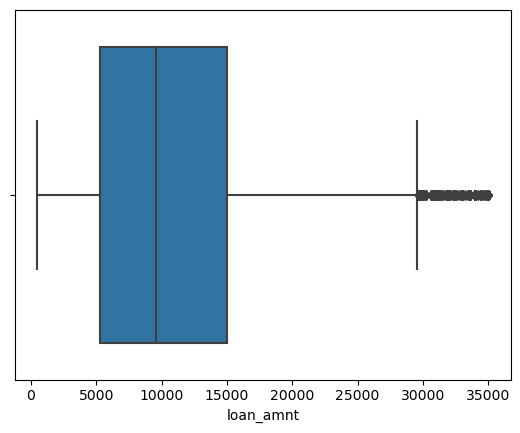

loan_amnt


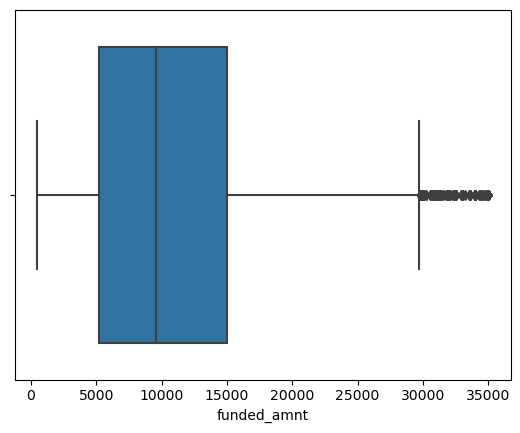

funded_amnt


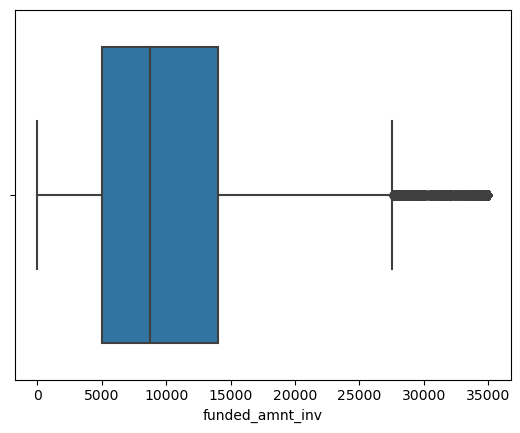

funded_amnt_inv


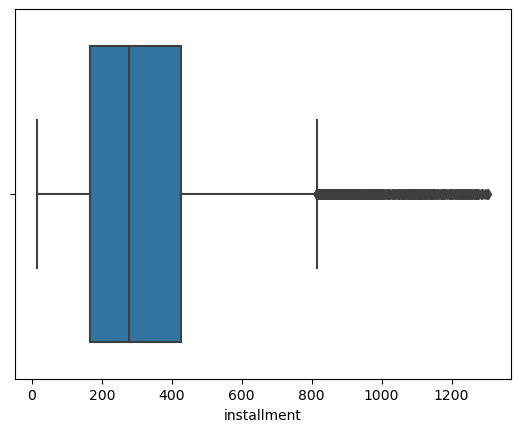

installment


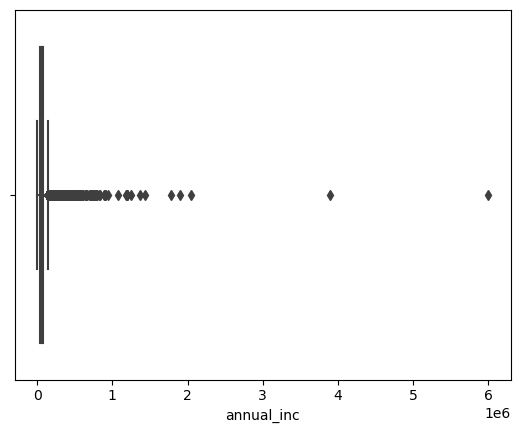

annual_inc


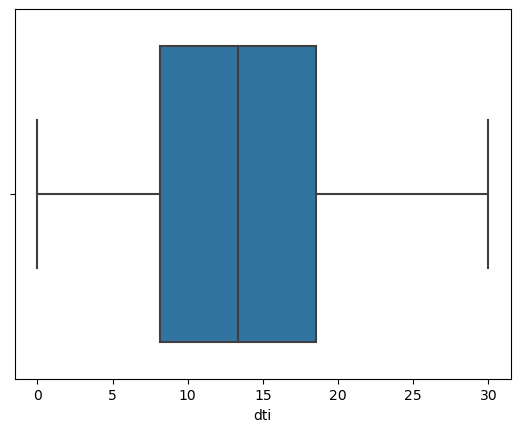

dti


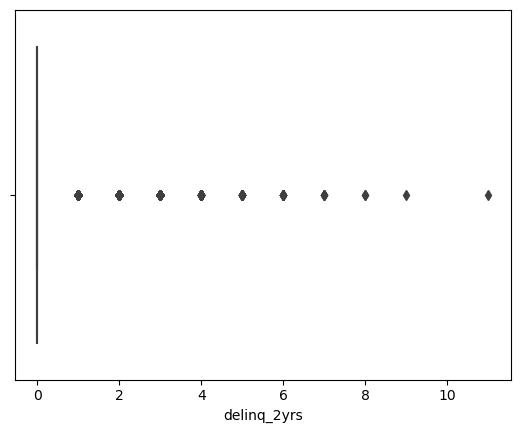

delinq_2yrs


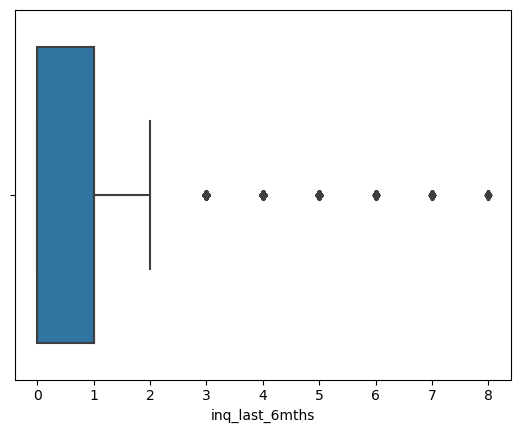

inq_last_6mths


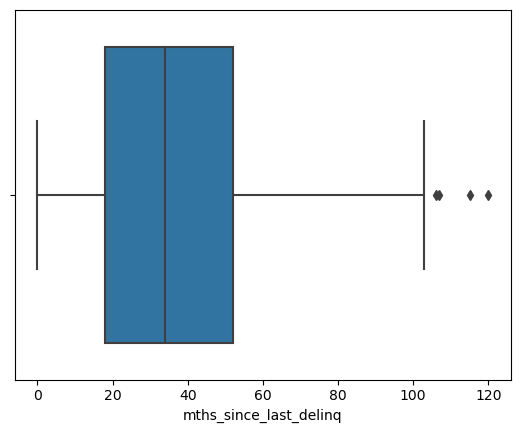

mths_since_last_delinq


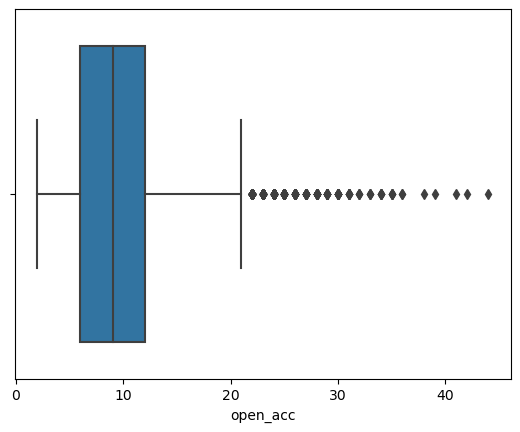

open_acc


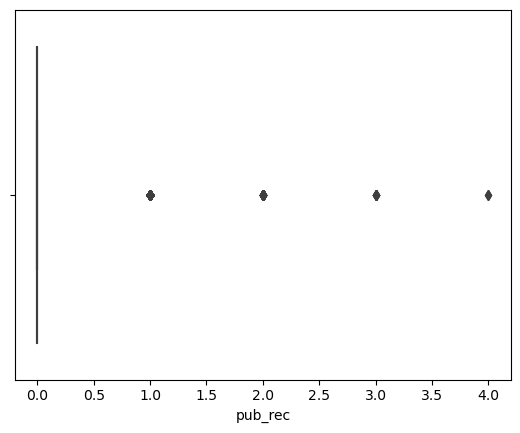

pub_rec


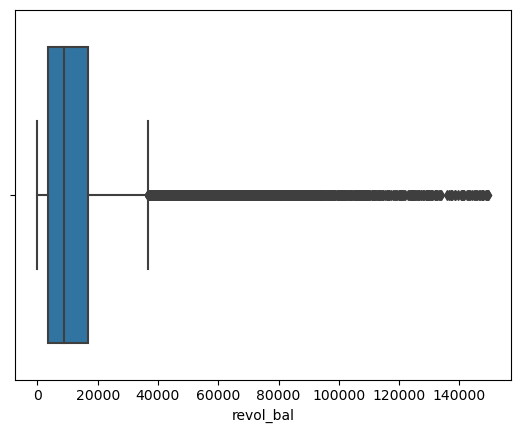

revol_bal


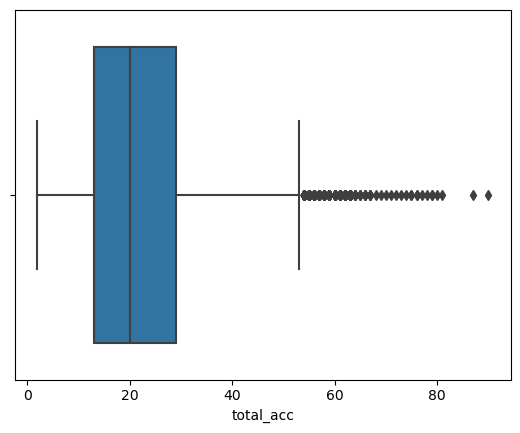

total_acc


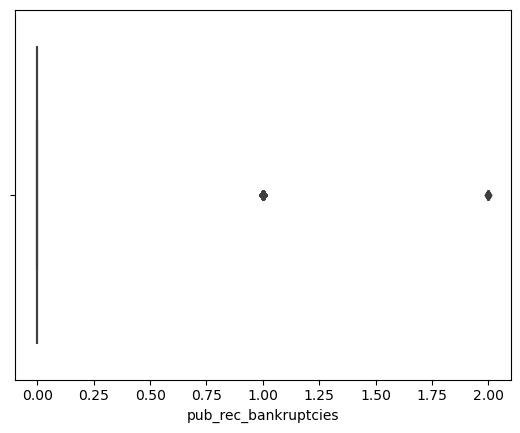

pub_rec_bankruptcies


In [35]:
### Create boxplot for all numeric columns
float=[]
for i in df.columns:
    if df[i].dtype in('float64','float32','int64', 'int32', 'int', 'float'): 
        sns.boxplot(df[pd.notna(df[i])][i])
        plt.show(all)
        print(i)   

## Data Skewness Check for each Variable - with distplot

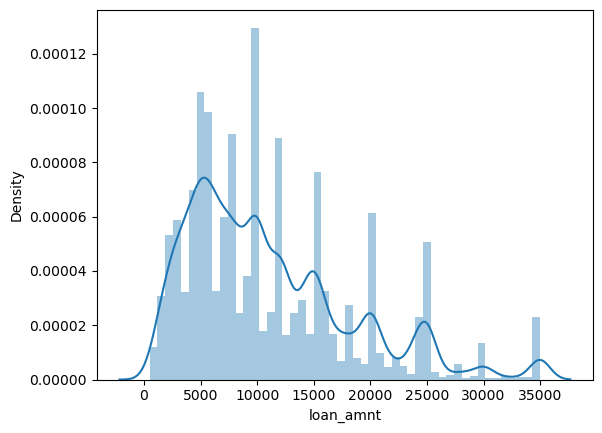

loan_amnt


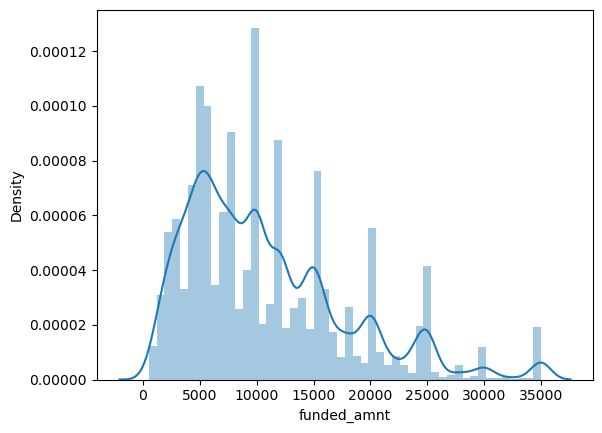

funded_amnt


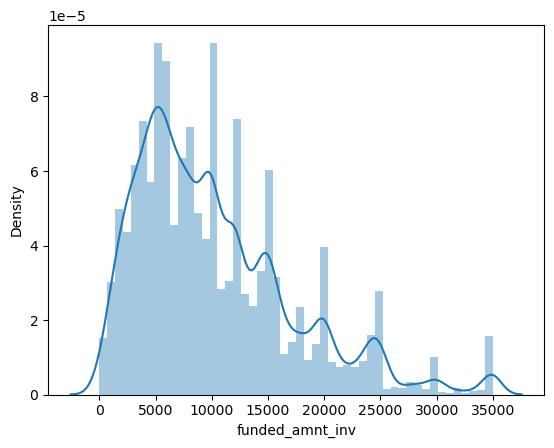

funded_amnt_inv


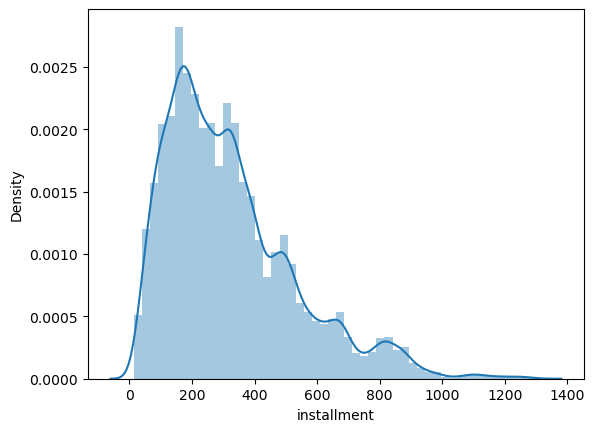

installment


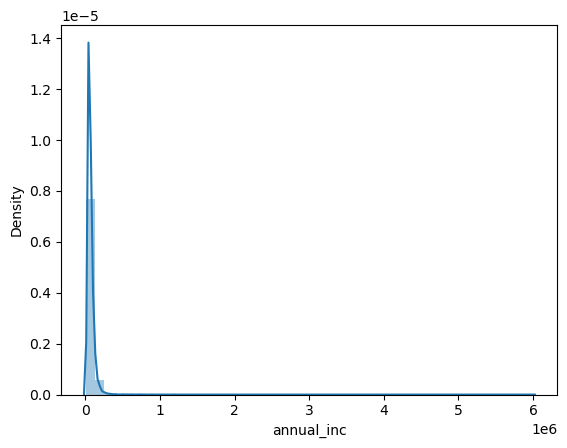

annual_inc


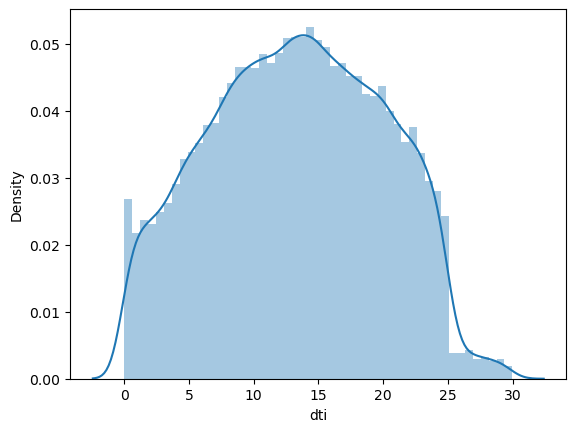

dti


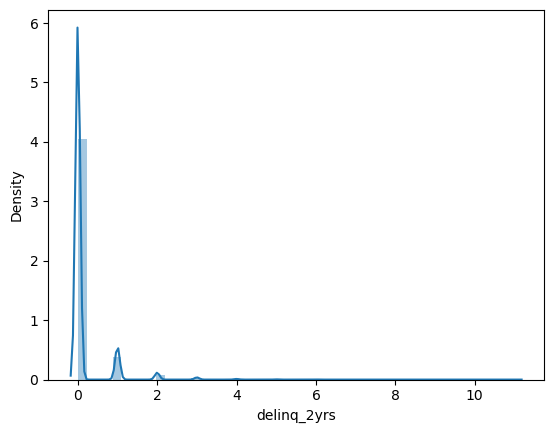

delinq_2yrs


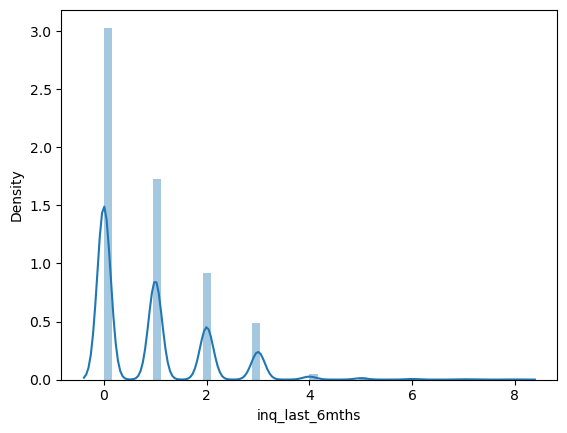

inq_last_6mths


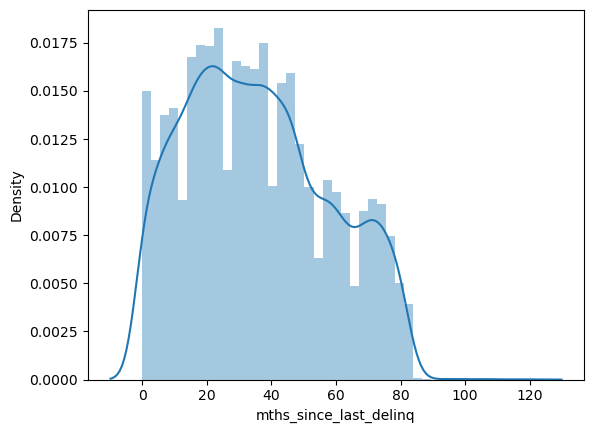

mths_since_last_delinq


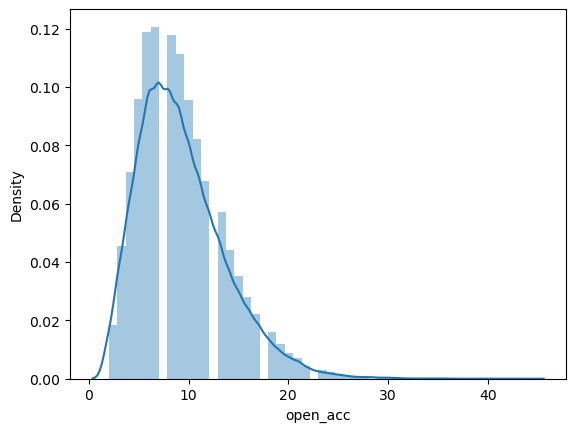

open_acc


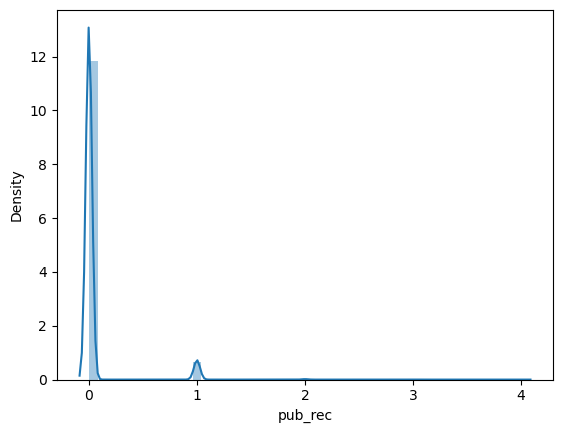

pub_rec


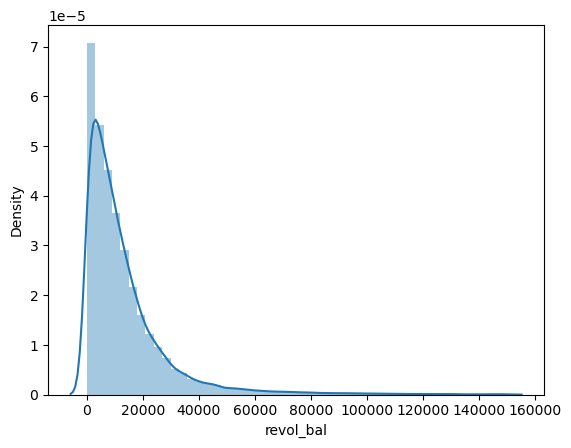

revol_bal


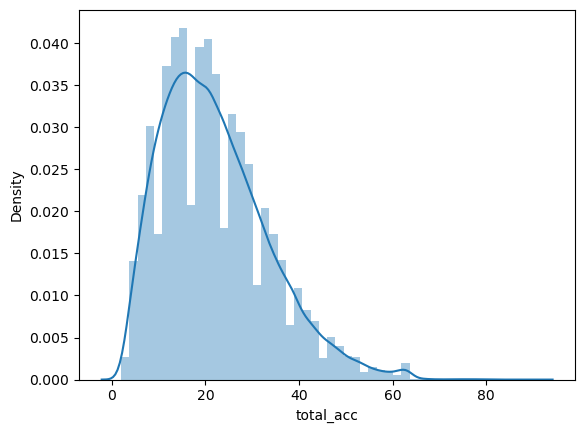

total_acc


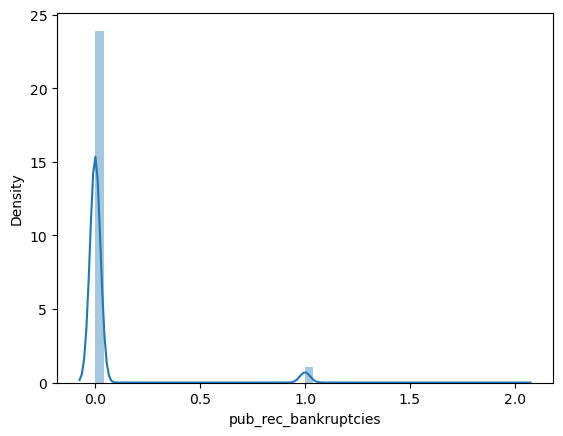

pub_rec_bankruptcies


In [36]:
### Create displot for all numeric columns
for i in df.columns:
    if df[i].dtype in('float64','float32','int64', 'int32', 'int', 'float'):
        sns.distplot(df[pd.notna(df[i])][i])
        plt.show(all)
        print(i)        

# A. Univariate Analysis

## Exclude outliers

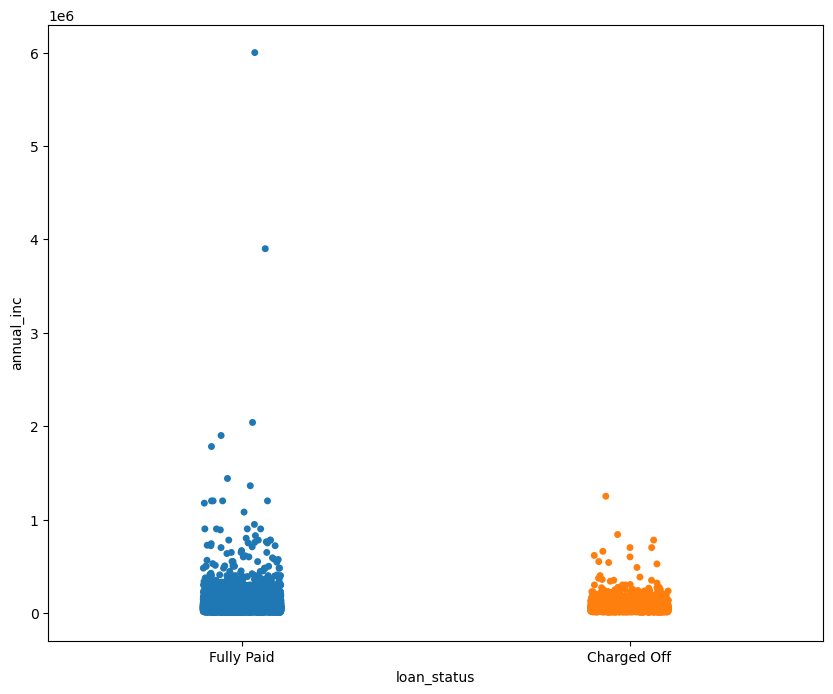

In [37]:
### Finding Outliers
plt.figure(figsize=[10,8])
sns.stripplot(x="loan_status",y="annual_inc",data=loan_df)
plt.show()

In [38]:
#Calculating Quartiles to decide the accpected range
Q1_Y = loan_df['annual_inc'].quantile(0.25)
Q3_Y = loan_df['annual_inc'].quantile(0.75)
IQR_Y = Q3_Y - Q1_Y

In [39]:
#Excluding the Outliers for annual_inc
print(loan_df.shape)
loan_df = loan_df[~np.logical_or(loan_df['annual_inc']< (Q1_Y-1.5*IQR_Y),loan_df['annual_inc']> (Q3_Y+1.5*IQR_Y))]
loan_df.shape

(38577, 33)


(36815, 33)

## Standardize Values

In [40]:
#Remove "months" from the column "term"
loan_df['term'] = loan_df['term'].apply(lambda x: int(x.split()[0]))

In [41]:
#Remove "%" Sign from the column "int_rate"
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: x.rstrip('%'))
loan_df['int_rate'] = pd.to_numeric(loan_df['int_rate'], errors='coerce', downcast='float')

loan_df['int_rate'].dtype

dtype('float32')

In [42]:
#Remove "%" Sign from the column "revol_util"
loan_df['revol_util'] = loan_df['revol_util'].apply(lambda x: str(x).rstrip('%'))
loan_df['revol_util'] = pd.to_numeric(loan_df['revol_util'], errors='coerce', downcast='float')
loan_df['revol_util'].dtype

dtype('float32')

In [43]:
#Standarized the column "emp_length"
loan_df['emp_length'] = loan_df['emp_length'].fillna('0 years')
loan_df['emp_length'] = loan_df['emp_length'].replace(['< 1 year','10+ years'],['1 year','10 years'])
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: int(x.split()[0]))

In [44]:
#issue_d has data in MON-YY format (DEC-11,JAN-10 etc),converting it to date format by considering the 1st Day of the corresponding month. 
loan_df['issue_d'] = loan_df['issue_d'].apply(lambda x: pd.to_datetime('01-'+x))

In [45]:
###Create new DataFrame for analysis
df = loan_df
df.shape
### Final df is ready for Analysis now

(36815, 33)

# B. Segmented Univariate Analysis

## B.1. Continuous Variables

## 1. Impact of int_rate on loan_status

In [46]:
print(df.mean()['int_rate'])
print(df.median()['int_rate'])
print(df.mode()['int_rate'])
print(df.quantile([0.1,0.9])['int_rate'])
df[(df['int_rate']>df.median()['int_rate'])].groupby(['loan_status']).size()*100/df.groupby(['loan_status']).size()
### Loans with int_rate > 11.7 have higher chance of default

11.889795303344727
11.710000038146973
0    10.99
Name: int_rate, dtype: float32
0.1     6.99
0.9    16.77
Name: int_rate, dtype: float64


loan_status
Charged Off    69.397901
Fully Paid     46.173209
dtype: float64

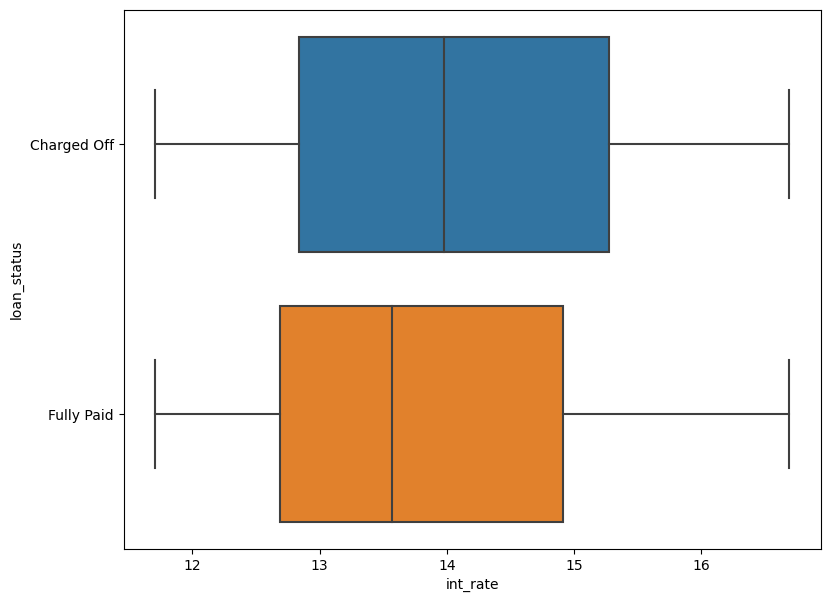

In [47]:
### Approx 23% 
plt.figure(figsize=[9,7])
sns.boxplot(x='int_rate', y='loan_status', data=df[(df['int_rate']>11.7) & ((df['int_rate']<16.7))])
plt.show()

## 2. Impact of revol_util on loan_status

In [48]:
print(df.mean()['revol_util'])
print(df.median()['revol_util'])
print(df.mode()['revol_util'])
print(df.quantile([0.1,0.9])['revol_util'])
df[(df['revol_util']>df.mean()['revol_util'])].groupby(['loan_status']).size()*100/df.groupby(['loan_status']).size()
### Loans with revol_util > 48.6 have higher chance of default

48.667213439941406
49.0
0    0.0
Name: revol_util, dtype: float32
0.1     8.600000
0.9    87.699997
Name: revol_util, dtype: float32


loan_status
Charged Off    60.246732
Fully Paid     48.684043
dtype: float64

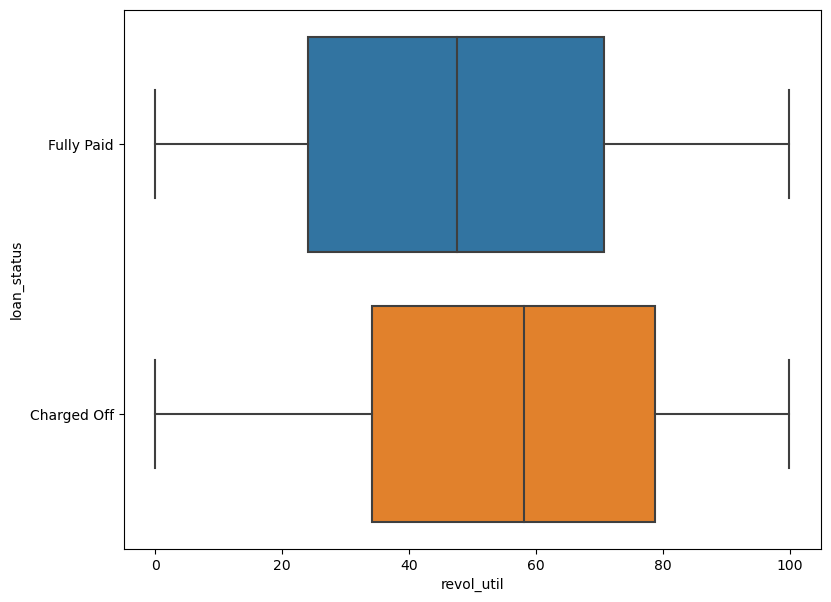

In [49]:
# Aprox 12%
plt.figure(figsize=[9,7])
sns.boxplot(x='revol_util', y='loan_status', data=df)#[(df['revol_util']>50) & ((df['revol_util']<80))])
plt.show()

## 3.1 Impact of dti on loan_status

In [50]:
print(df.mean()['dti'])
print(df.median()['dti'])
print(df.mode()['dti'])
print(df.quantile([0.1,0.9])['dti'])
df[(df['dti']>df.mean()['dti'])].groupby(['loan_status']).size()*100/df.groupby(['loan_status']).size()
### Loans with revol_util > 48.6 have higher chance of default

13.437614016026103
13.57
0    0.0
Name: dti, dtype: float64
0.1     4.17
0.9    22.38
Name: dti, dtype: float64


loan_status
Charged Off    55.312097
Fully Paid     49.920342
dtype: float64

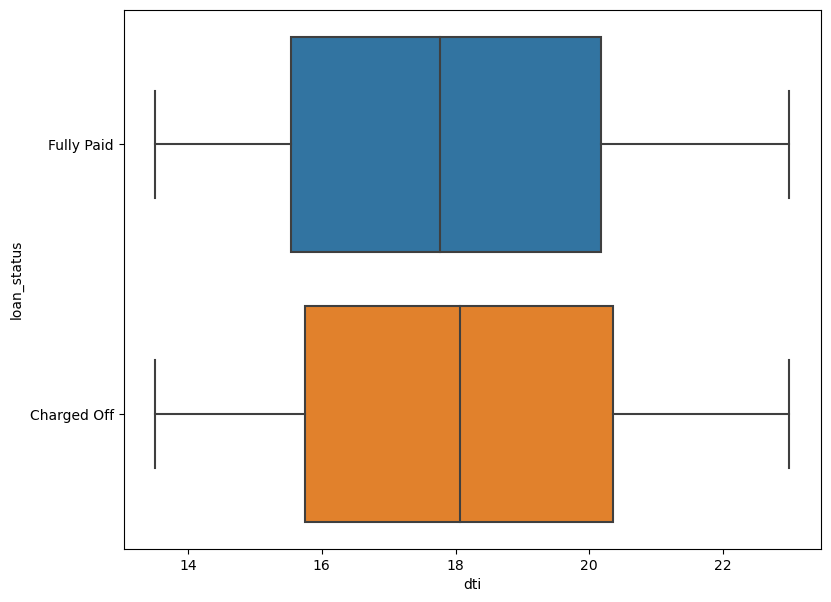

In [51]:
# Aprox 5% higher chance
plt.figure(figsize=[9,7])
sns.boxplot(x='dti', y='loan_status', data=df[(df['dti']>13.5) & ((df['dti']<23))])
plt.show()

## 3.2 Impact of new_dti (Derived Column) on loan_status
#### Existing DTI column will not be True indicatior of DTI after teh loan is taken, hence a derived column is created for True DTI calculation
#### new_dti = Current lc Installment to income(monthly) Ratio + dti (before appliction)


In [52]:
df['iti']=round((df['installment']/(df['annual_inc']/12))*100,2)
df['new_dti']=df['iti']+df['dti']

In [53]:
print(df.mean()['new_dti'])
print(df.median()['new_dti'])
print(df.mode()['new_dti'])
print(df.quantile([0.1,0.9])['new_dti'])
df[(df['new_dti']>df.mean()['new_dti'])].groupby(['loan_status']).size()*100/df.groupby(['loan_status']).size()
### Loans with new_dti > 20 have higher chance of default

20.157056362895577
20.13
0    16.32
Name: new_dti, dtype: float64
0.1     9.24
0.9    31.01
Name: new_dti, dtype: float64


loan_status
Charged Off    57.724176
Fully Paid     48.502422
dtype: float64

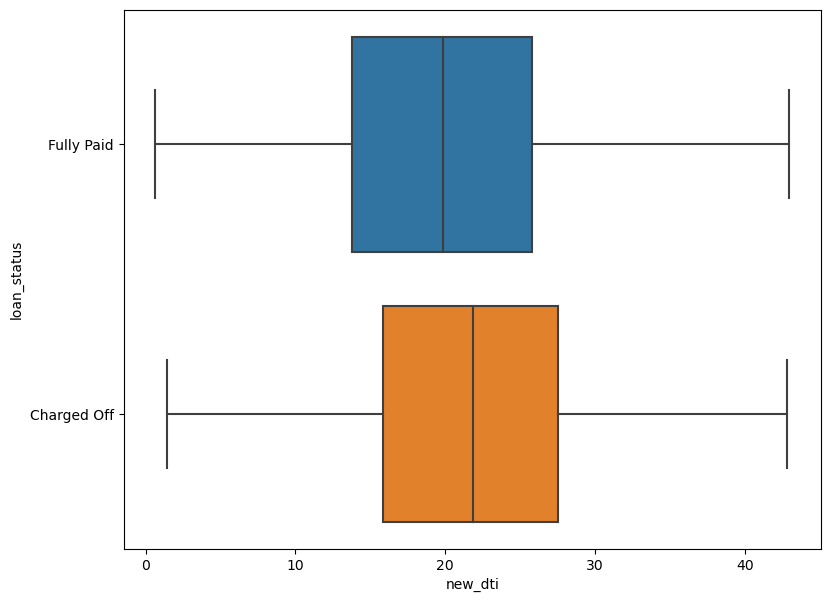

In [54]:
# Aprox 9% higher chance
plt.figure(figsize=[9,7])
sns.boxplot(x='new_dti', y='loan_status', data=df)#[(df['dti']>15) & ((df['dti']<28))])
plt.show()

## 4. Impact of loan_amnt on loan_status

In [55]:
print(df.mean()['loan_amnt'])
print(df.median()['loan_amnt'])
print(df.mode()['loan_amnt'])
print(df.quantile([0.1,0.9])['loan_amnt'])
### Loans with loan_amnt> median have higher chance of default 
df[(df['loan_amnt']>df.median()['loan_amnt'])].groupby(['loan_status']).size()*100/df.groupby(['loan_status']).size()
# df[(df['loan_amnt'] > 10 )].groupby(['loan_status']).size()*100/df.groupby(['loan_status']).size()

10706.984924623115
9250.0
0    10000
Name: loan_amnt, dtype: int64
0.1     3000.0
0.9    20000.0
Name: loan_amnt, dtype: float64


loan_status
Charged Off    54.686061
Fully Paid     49.111012
dtype: float64

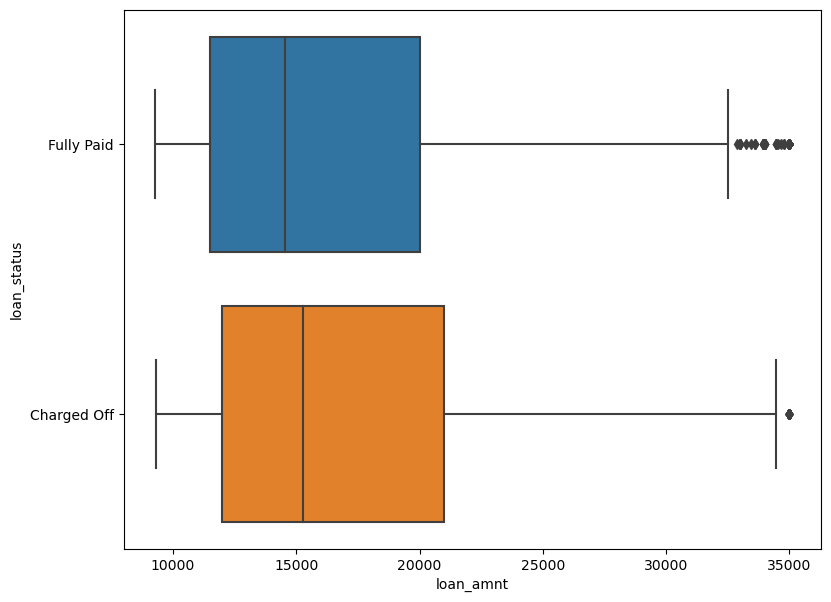

In [56]:
# Aprox 7% higher chance
plt.figure(figsize=[9,7])
sns.boxplot(x='loan_amnt', y='loan_status', data=df[(df['loan_amnt']>df.median()['loan_amnt'])])
plt.show()

## 5. Impact of annual_inc on loan_status

In [57]:
print(df.mean()['annual_inc'])
print(df.median()['annual_inc'])
print(df.mode()['annual_inc'])
print(df.quantile([0.1,0.9])['annual_inc'])
### Loans with annual_inc> median have higher chance of default 
df[(df['annual_inc']<df.median()['annual_inc'])].groupby(['loan_status']).size()*100/df.groupby(['loan_status']).size()

61218.193490153426
56000.0
0    60000.0
Name: annual_inc, dtype: float64
0.1     29169.6
0.9    100833.6
Name: annual_inc, dtype: float64


loan_status
Charged Off    56.048610
Fully Paid     48.394086
dtype: float64

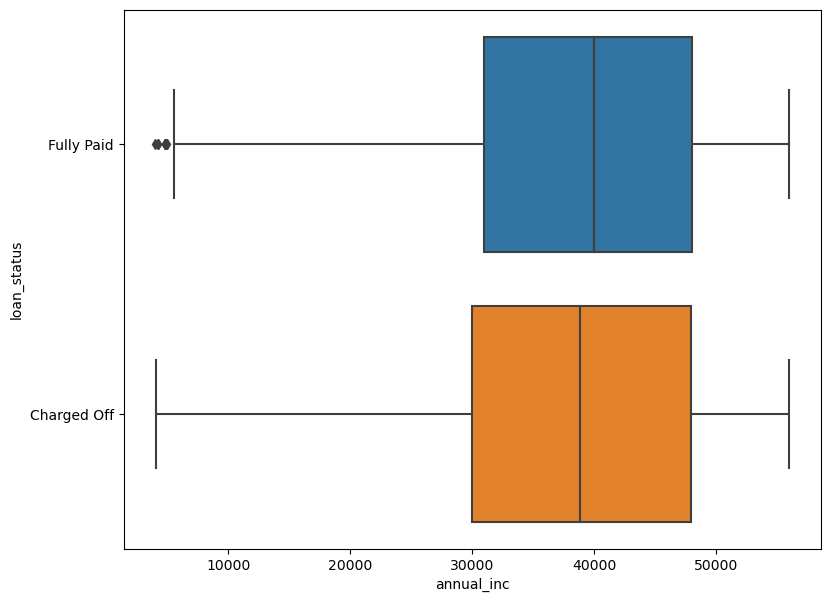

In [58]:
# Aprox 8% higher chance
plt.figure(figsize=[9,7])
sns.boxplot(x='annual_inc', y='loan_status', data=df[(df['annual_inc']<df.median()['annual_inc'])])
plt.show()

## 6. Impact of open_acc on loan_status

In [59]:
print(df.mean()['open_acc'])
print(df.median()['open_acc'])
print(df.mode()['open_acc'])
print(df.quantile([0.1,0.9])['open_acc'])
df[(df['open_acc'] > 10 )].groupby(['loan_status']).size()*100/df.groupby(['loan_status']).size()
### Aprox 8% higher chance

9.17482004617683
8.0
0    7
Name: open_acc, dtype: int64
0.1     4.0
0.9    15.0
Name: open_acc, dtype: float64


loan_status
Charged Off    31.780519
Fully Paid     32.398674
dtype: float64

## 7. Impact of pub_rec on loan_status

In [60]:
print(df.mean()['pub_rec'])
print(df.median()['pub_rec'])
print(df.mode()['pub_rec'])
print(df.quantile([0.1,0.99])['pub_rec'])
df[(df['pub_rec'] > 0 )].groupby(['loan_status']).size()*100/df.groupby(['loan_status']).size()
### Aprox 4% higher chance

0.056688849653673774
0.0
0    0
Name: pub_rec, dtype: int64
0.10    0.0
0.99    1.0
Name: pub_rec, dtype: float64


loan_status
Charged Off    8.451482
Fully Paid     4.983431
dtype: float64

## 8. Impact of pub_rec_bankruptcies on loan_status

In [61]:
print(df.mean()['pub_rec_bankruptcies'])
print(df.median()['pub_rec_bankruptcies'])
print(df.mode()['pub_rec_bankruptcies'])
print(df.quantile([0.1,0.99])['pub_rec_bankruptcies'])
df[(df['pub_rec_bankruptcies'] > 0 )].groupby(['loan_status']).size()*100/df.groupby(['loan_status']).size()
### Aprox 3% higher chance

0.04458704431044974
0.0
0    0.0
Name: pub_rec_bankruptcies, dtype: float64
0.10    0.0
0.99    1.0
Name: pub_rec_bankruptcies, dtype: float64


loan_status
Charged Off    6.683852
Fully Paid     3.963803
dtype: float64

## 9. Impact of total_acc on loan_status

In [62]:
print(df.mean()['total_acc'])
print(df.median()['total_acc'])
print(df.mode()['total_acc'])
print(df.quantile([0.1,0.99])['total_acc'])
df[(df['total_acc'] > 50 )].groupby(['loan_status']).size()*100/df.groupby(['loan_status']).size()
### Aprox 3% higher chance

21.672416134727694
20.0
0    15
Name: total_acc, dtype: int64
0.10     9.0
0.99    55.0
Name: total_acc, dtype: float64


loan_status
Charged Off    1.473025
Fully Paid     1.832144
dtype: float64

## B.2. Categorical Variable - Ordered & UnOrdered
### For all the analysis below created a Derived column "Ratio" to deal with the imbalance of the data

### 1. Impact of term on loan_status

loan_status  Charged Off  Fully Paid
term                                
36             57.447984   78.756691
60             42.552016   21.243309


<AxesSubplot:xlabel='term'>

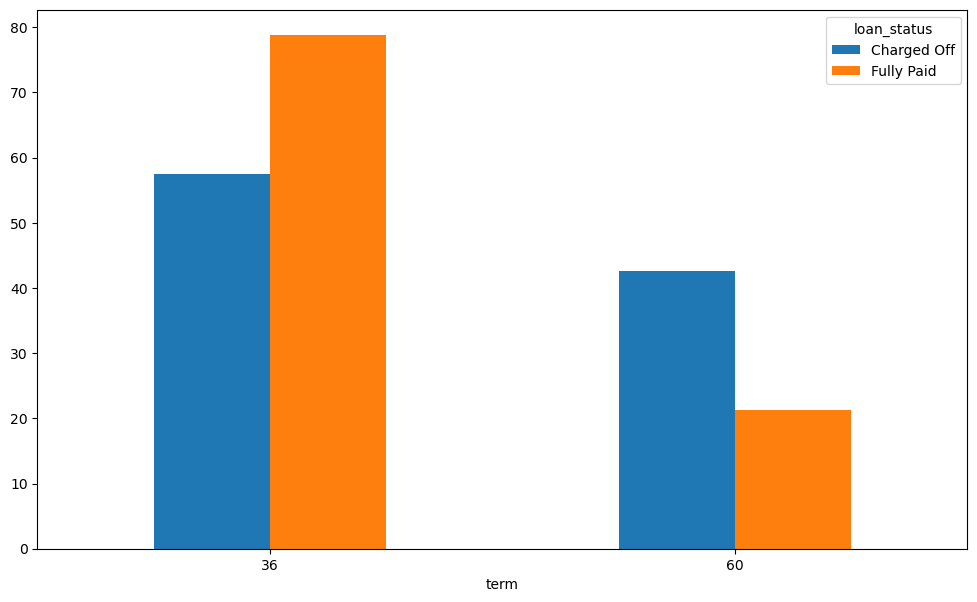

In [63]:
df_ser=df.groupby(['term','loan_status']).size()/df.groupby(['loan_status']).size()
df_pv1=df_ser.unstack().unstack(['term'])
df_pv2=df_pv1.reset_index()
df_pv2['ratio'] = df_pv2.iloc[:,-1]*100
CrosstabResult=pd.crosstab(index=df_pv2['loan_status'],columns=df_pv2['term'],values=df_pv2['ratio'], aggfunc='sum')
#print(CrosstabResult)

tmp=CrosstabResult.transpose()
#tmp = tmp[(tmp['Charged Off']-tmp['Fully Paid'])>0]
print(tmp)
%matplotlib inline
tmp.plot.bar(figsize=(12,7),rot=0)

### 2. Impact of purpose on loan_status

loan_status         Charged Off  Fully Paid
purpose                                    
debt_consolidation    49.419996   46.820036
educational            0.994292    0.825261
house                  1.012705    0.901733
medical                1.914933    1.714249
moving                 1.657153    1.465715
other                 11.176579    9.893576
renewable_energy       0.331431    0.245348
small_business         8.359418    3.743946


<AxesSubplot:xlabel='purpose'>

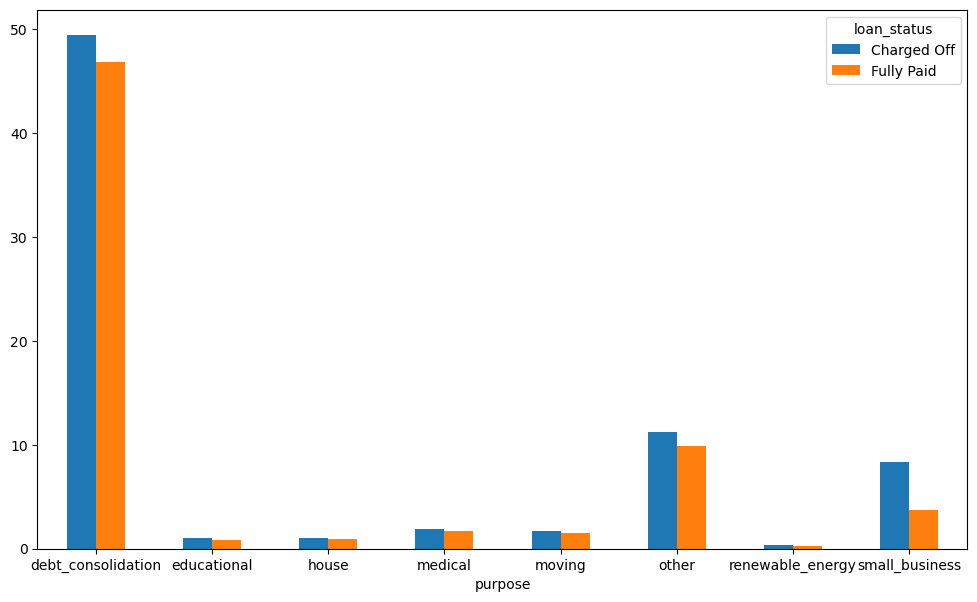

In [64]:
df_ser=df.groupby(['purpose','loan_status']).size()/df.groupby(['loan_status']).size()
df_pv1=df_ser.unstack().unstack(['purpose'])
df_pv2=df_pv1.reset_index()
df_pv2['ratio'] = df_pv2.iloc[:,-1]*100
CrosstabResult=pd.crosstab(index=df_pv2['loan_status'],columns=df_pv2['purpose'],values=df_pv2['ratio'], aggfunc='sum')
#print(CrosstabResult)

tmp=CrosstabResult.transpose()
tmp = tmp[(tmp['Charged Off']-tmp['Fully Paid'])>0]
print(tmp)
%matplotlib inline
tmp.plot.bar(figsize=(12,7),rot=0)

### 3. Impact of addr_state on loan_status 

loan_status  Charged Off  Fully Paid
addr_state                          
AK              0.239367    0.184808
CA             19.830602   17.563089
FL              8.967041    6.946215
GA              3.866691    3.469921
HI              0.515559    0.420596
ID              0.018413    0.015932
KY              0.828577    0.825261
MD              2.872399    2.606424
MO              2.043823    1.723808
NC              2.080648    1.937293
NE              0.055238    0.006373
NH              0.460320    0.430155
NJ              4.971460    4.489549
NM              0.552384    0.471578
NV              1.896520    1.137522
OR              1.288897    1.140709
SD              0.220954    0.159317
UT              0.699687    0.650013
WA              2.283189    2.115728


<AxesSubplot:xlabel='addr_state'>

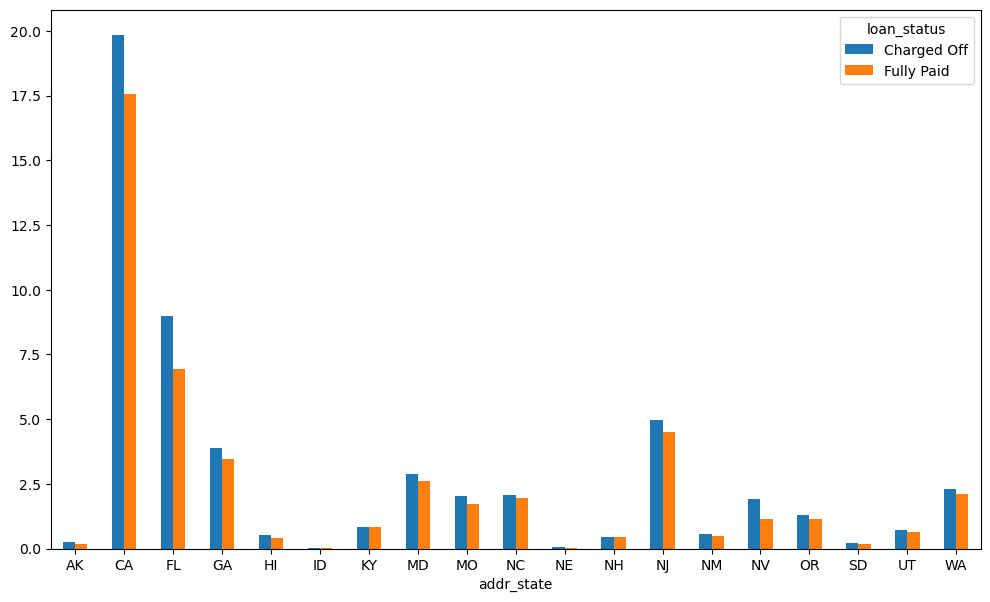

In [65]:
df_ser=df.groupby(['addr_state','loan_status']).size()/df.groupby(['loan_status']).size()
df_pv1=df_ser.unstack().unstack(['addr_state'])
df_pv1=df_pv1.reset_index()
df_pv1['ratio'] = df_pv1.iloc[:,-1]*100
CrosstabResult=pd.crosstab(index=df_pv1['loan_status'],columns=df_pv1['addr_state'],values=df_pv1['ratio'], aggfunc='sum')
#print(CrosstabResult)

tmp=CrosstabResult.transpose()
tmp = tmp[(tmp['Charged Off']-tmp['Fully Paid'])>0]
print(tmp)
%matplotlib inline
tmp.plot.bar(figsize=(12,7),rot=0)

### 4. Impact of emp_length on loan_status 

loan_status  Charged Off  Fully Paid
emp_length                          
0               4.142883    2.520393
7               4.640029    4.444940
10             23.494752   21.211445


<AxesSubplot:xlabel='emp_length'>

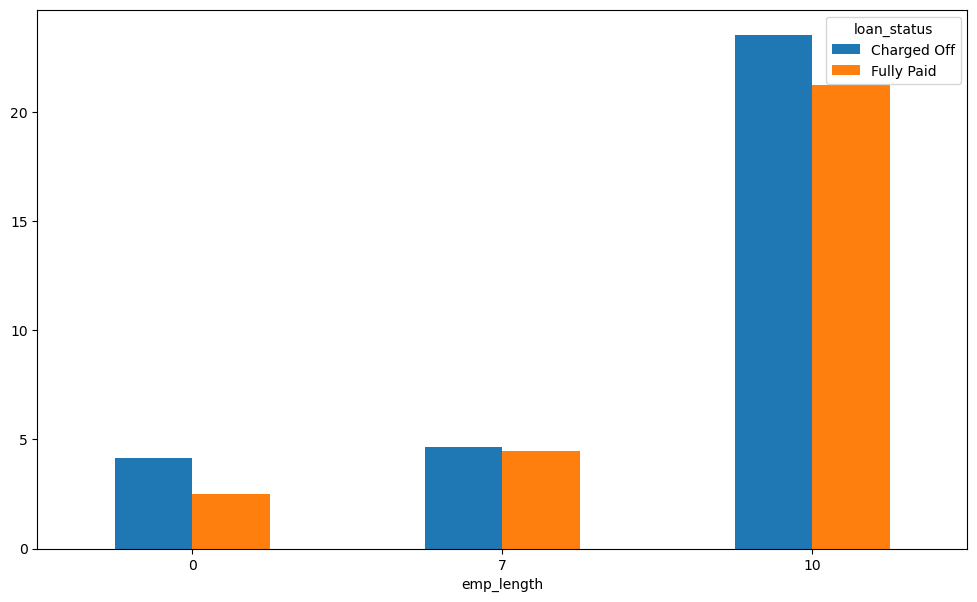

In [66]:
df_ser=df.groupby(['emp_length','loan_status']).size()/df.groupby(['loan_status']).size()
df_pv1=df_ser.unstack().unstack(['emp_length'])
df_pv1=df_pv1.reset_index()
df_pv1['ratio'] = df_pv1.iloc[:,-1]*100
CrosstabResult=pd.crosstab(index=df_pv1['loan_status'],columns=df_pv1['emp_length'],values=df_pv1['ratio'], aggfunc='sum')
#print(CrosstabResult)

tmp=CrosstabResult.transpose()
tmp = tmp[(tmp['Charged Off']-tmp['Fully Paid'])>0]
print(tmp)
%matplotlib inline
tmp.plot.bar(figsize=(12,7),rot=0)

### 5. Impact of home_ownership on loan_status

loan_status     Charged Off  Fully Paid
home_ownership                         
OTHER              0.313018    0.242162
OWN                8.027987    7.730054
RENT              51.077150   48.715906


<AxesSubplot:xlabel='home_ownership'>

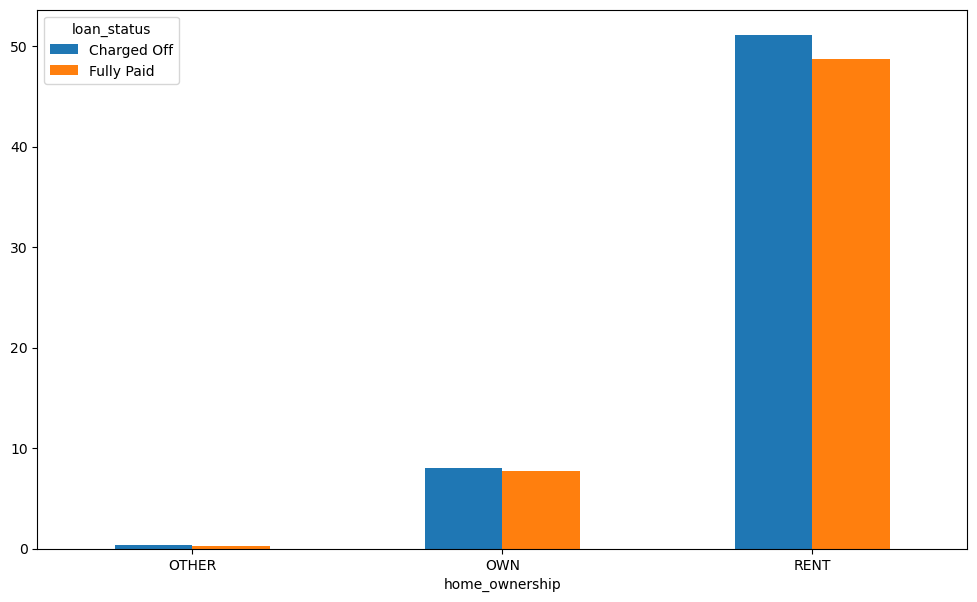

In [67]:
df_ser=df.groupby(['home_ownership','loan_status']).size()/df.groupby(['loan_status']).size()
df_pv1=df_ser.unstack().unstack(['home_ownership'])
df_pv1=df_pv1.reset_index()
df_pv1['ratio'] = df_pv1.iloc[:,-1]*100
CrosstabResult=pd.crosstab(index=df_pv1['loan_status'],columns=df_pv1['home_ownership'],values=df_pv1['ratio'], aggfunc='sum')
#print(CrosstabResult)
tmp=CrosstabResult.transpose()
tmp = tmp[(tmp['Charged Off']-tmp['Fully Paid'])>0]
print(tmp)
%matplotlib inline
tmp.plot.bar(figsize=(12,7),rot=0)

### 6. Impact of zip_code on loan_status

loan_status  Charged Off  Fully Paid
zip_code                            
080xx           0.791751    0.576727
301xx           0.699687    0.471578
302xx           0.478733    0.245348
330xx           0.902228    0.602218
331xx           1.288897    0.806143
641xx           0.460320    0.254907
890xx           0.570797    0.293143
891xx           1.123182    0.548050
907xx           0.497146    0.286770
913xx           0.846990    0.627708
917xx           1.252071    0.825261
925xx           0.846990    0.567168
935xx           0.589210    0.213485


<AxesSubplot:xlabel='zip_code'>

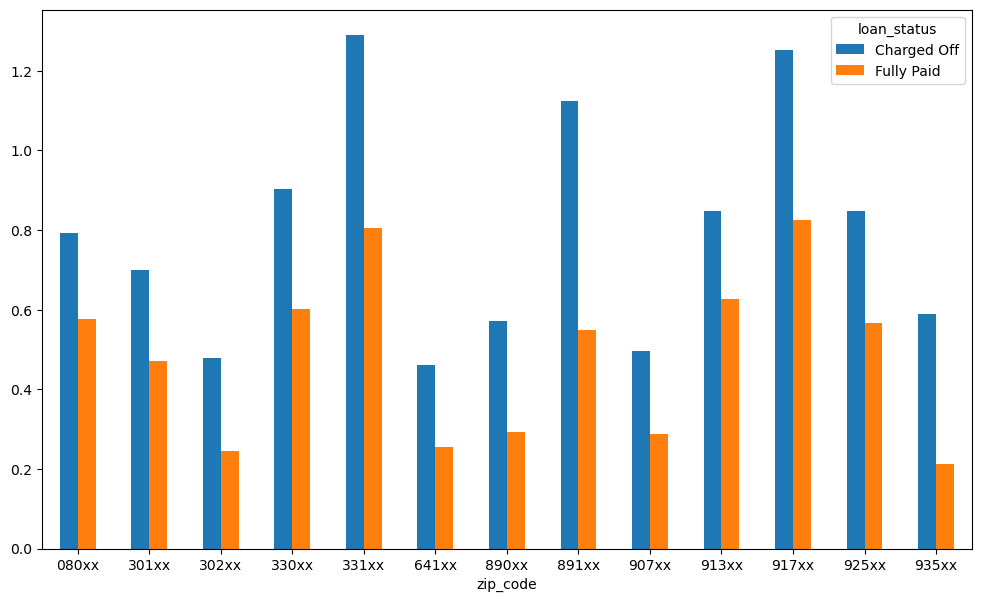

In [68]:
df_ser=df.groupby(['zip_code','loan_status']).size()/df.groupby(['loan_status']).size()
df_pv1=df_ser.unstack().unstack(['zip_code'])
df_pv1=df_pv1.reset_index()
df_pv1['ratio'] = df_pv1.iloc[:,-1]*100
CrosstabResult=pd.crosstab(index=df_pv1['loan_status'],columns=df_pv1['zip_code'],values=df_pv1['ratio'], aggfunc='sum')
#print(CrosstabResult)
tmp=CrosstabResult.transpose()
tmp = tmp[(tmp['Charged Off']-tmp['Fully Paid'])>0.2]
print(tmp)
%matplotlib inline
tmp.plot.bar(figsize=(12,7),rot=0)

### 7. Impact of verification_status on loan_status

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified           38.648499   45.312898
Source Verified        25.317621   24.917155
Verified               36.033880   29.769946


<AxesSubplot:xlabel='verification_status'>

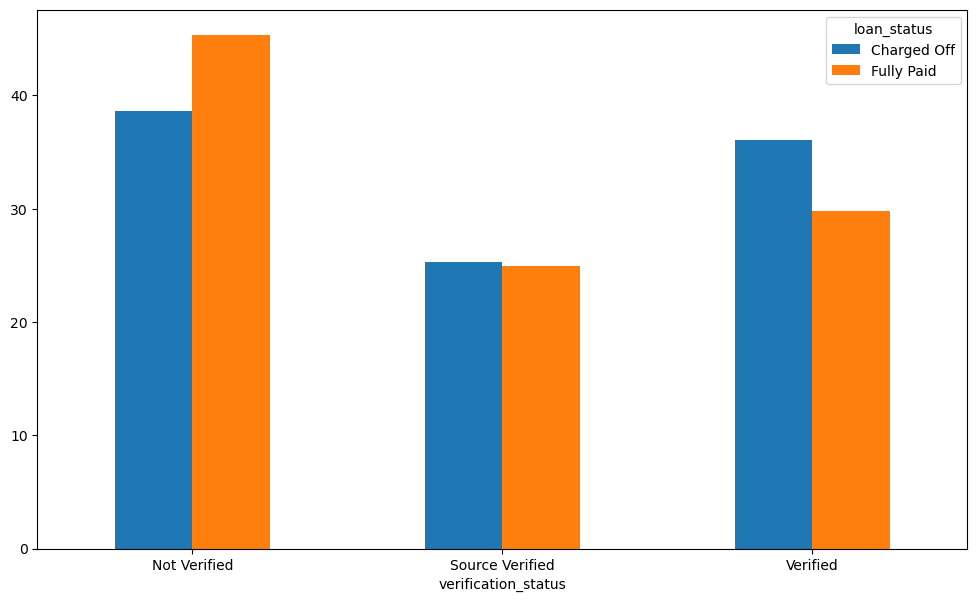

In [69]:
df_ser=df.groupby(['verification_status','loan_status']).size()/df.groupby(['loan_status']).size()
df_pv1=df_ser.unstack().unstack(['verification_status'])
df_pv1=df_pv1.reset_index()
df_pv1['ratio'] = df_pv1.iloc[:,-1]*100
CrosstabResult=pd.crosstab(index=df_pv1['loan_status'],columns=df_pv1['verification_status'],values=df_pv1['ratio'], aggfunc='sum')
#print(CrosstabResult)
tmp=CrosstabResult.transpose()
#tmp = tmp[(tmp['Charged Off']-tmp['Fully Paid'])>0]
print(tmp)
%matplotlib inline
tmp.plot.bar(figsize=(12,7),rot=0)

### 8. Impact of grade on loan_status

<AxesSubplot:xlabel='grade'>

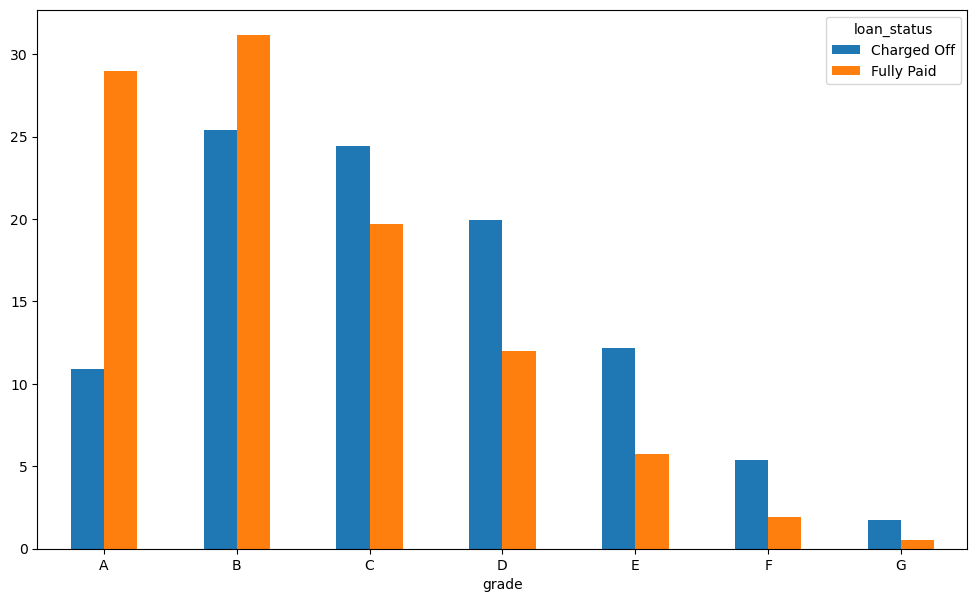

In [70]:
df_ser=df.groupby(['grade','loan_status']).size()/df.groupby(['loan_status']).size()
df_pv1=df_ser.unstack().unstack(['grade'])
df_pv2=df_pv1.reset_index()
df_pv2['ratio'] = df_pv2.iloc[:,-1]*100
CrosstabResult=pd.crosstab(index=df_pv2['loan_status'],columns=df_pv2['grade'],values=df_pv2['ratio'], aggfunc='sum')
#print(CrosstabResult)

tmp=CrosstabResult.transpose()
#tmp = tmp[(tmp['Charged Off']-tmp['Fully Paid'])>0]
#print(df)
%matplotlib inline
tmp.plot.bar(figsize=(12,7),rot=0)

### 9. Impact of sub_grade on loan_status

<AxesSubplot:xlabel='sub_grade'>

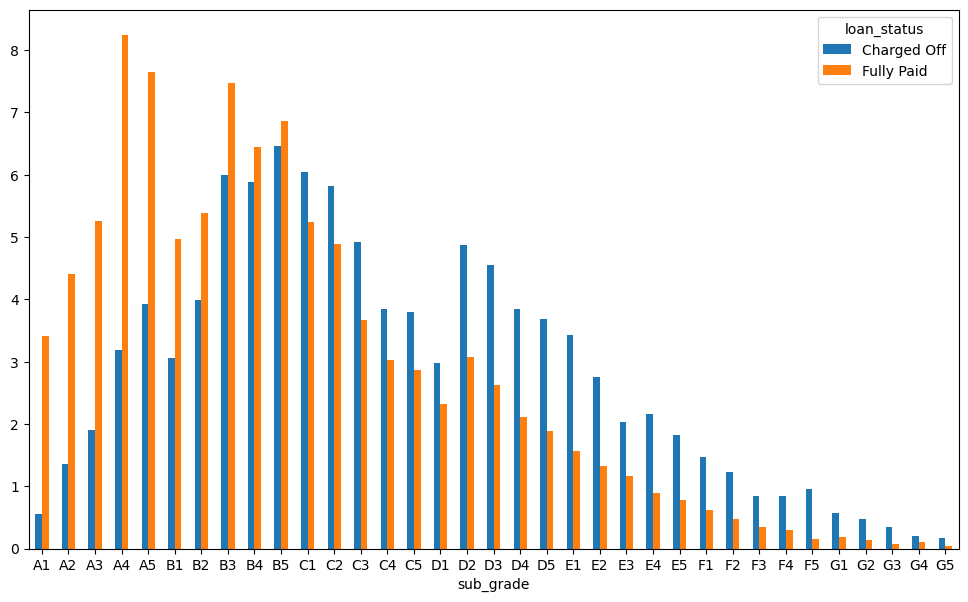

In [71]:
df_ser=df.groupby(['sub_grade','loan_status']).size()/df.groupby(['loan_status']).size()
df_pv1=df_ser.unstack().unstack(['sub_grade'])
df_pv2=df_pv1.reset_index()
df_pv2['ratio'] = df_pv2.iloc[:,-1]*100
CrosstabResult=pd.crosstab(index=df_pv2['loan_status'],columns=df_pv2['sub_grade'],values=df_pv2['ratio'], aggfunc='sum')
#print(CrosstabResult)

tmp=CrosstabResult.transpose()
#tmp = tmp[(tmp['Charged Off']-tmp['Fully Paid'])>0]
#print(df)
%matplotlib inline
tmp.plot.bar(figsize=(12,7),rot=0)

# C. Bivariant Analysis

## Correlation Analysis

In [72]:
### correlation analysis for all columns
corr=df.corr()
# print(corr.head(2))
index=[]
column=[]
value=[]
for i in range(len(corr.index)):
   for j in range(len(corr.index)):
       #if corr.iloc[i,j] > 0.75  and corr.iloc[i,j] != 1:
        if corr.iloc[i,j] !=1:
           column.append(corr.columns[i])
           index.append(corr.index[j])
           value.append((corr.iloc[i,j]))

correlation=pd.DataFrame({'columns':column,'index':index,'value':value})
correlation=correlation.sort_values(by='value',ascending=False)
# print(correlation.head(2))

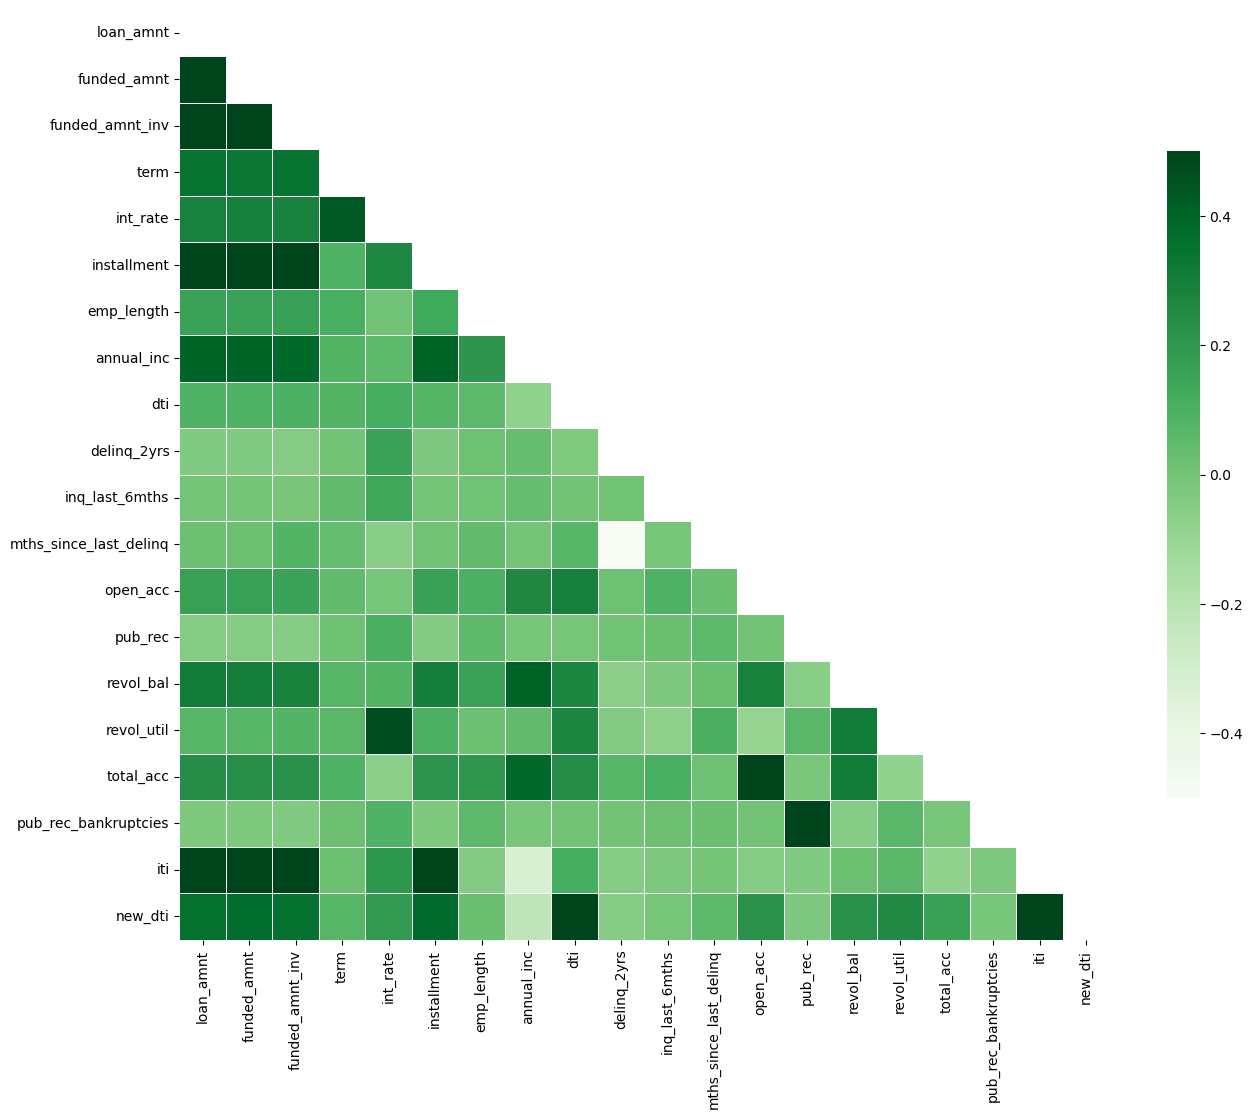

In [73]:
### Create Corrrelation Plot

from sklearn.preprocessing import MultiLabelBinarizer 

def relation_heatmap(df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 14))
    pl = sns.heatmap(corr, mask=mask, cmap= "Greens", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7, cbar_kws={"shrink": 0.6})
    
    plt.show()

relation_heatmap(df, 'Loan Correlation')

### 1. Identify a group of variables that point towards Default

In [74]:
# The following variables all together contribute towards Higher chance of Default
pv = df.pivot_table(index=['loan_status'],aggfunc={'int_rate':'mean','revol_util':'mean','installment':'mean','dti':'mean',
                                                                        'delinq_2yrs':'mean','inq_last_6mths':'mean','revol_bal':'mean',
                                                       'pub_rec_bankruptcies':'mean'})


In [75]:
df_pv = pv.unstack().unstack('loan_status').reset_index()
df_pv['default_ind'] = df_pv.apply(lambda x: 'Y' if x['Charged Off'] > x['Fully Paid']>0 else 'N',axis=1)
df_pv.head(10)
### The table shows that Default possibilty is higher for all these columns

loan_status,index,Charged Off,Fully Paid,default_ind
0,delinq_2yrs,0.168477,0.141187,Y
1,dti,14.102541,13.322548,Y
2,inq_last_6mths,1.056711,0.831029,Y
3,installment,328.484191,309.843047,Y
4,int_rate,13.763178,11.565708,Y
5,pub_rec_bankruptcies,0.068635,0.040440,Y
6,revol_bal,12769.276745,12299.908743,Y
7,revol_util,55.366863,47.509823,Y


### 2. Impact of loan_amnt and annual_inc on loan_status

In [76]:
bdf=df[(df['loan_amnt']> 20000) & (df['annual_inc']> 40000) & (df['annual_inc']<75000) & (df['purpose']=='small_business')]

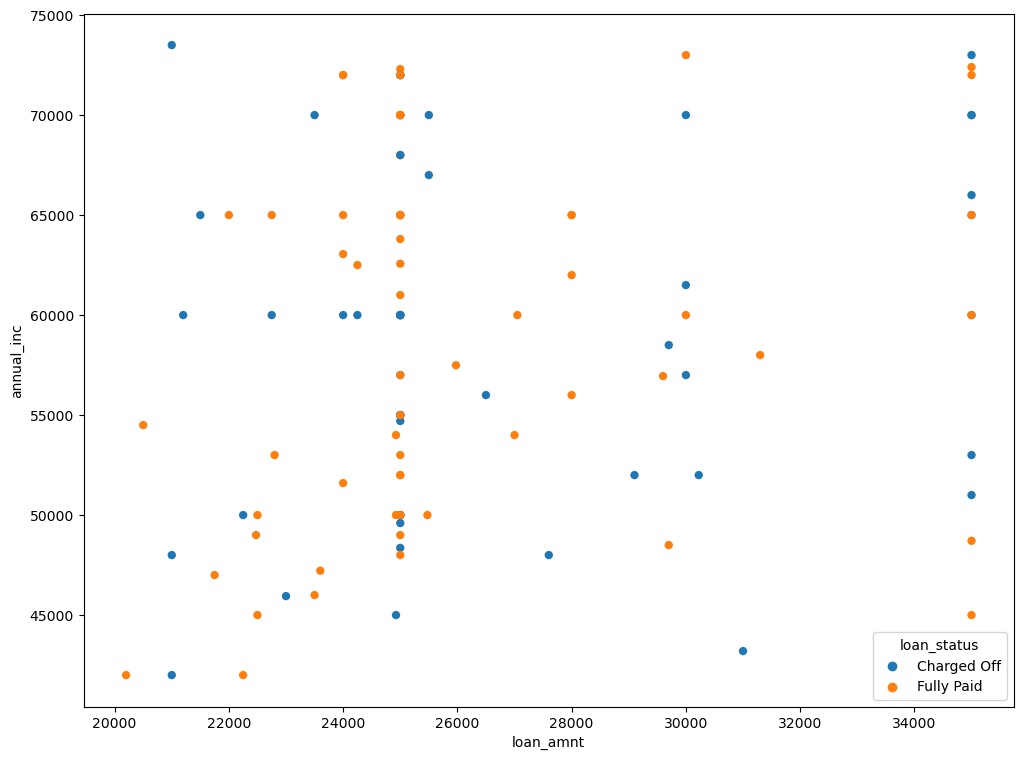

In [77]:
bdf=df[(df['loan_amnt']> 20000) & (df['annual_inc']> 40000) & (df['annual_inc']<75000) & (df['purpose']=='small_business')]
plt.figure(figsize=[12,9])
sns.scatterplot(x='loan_amnt', y='annual_inc', data=bdf, hue='loan_status', ec=None)
plt.show()

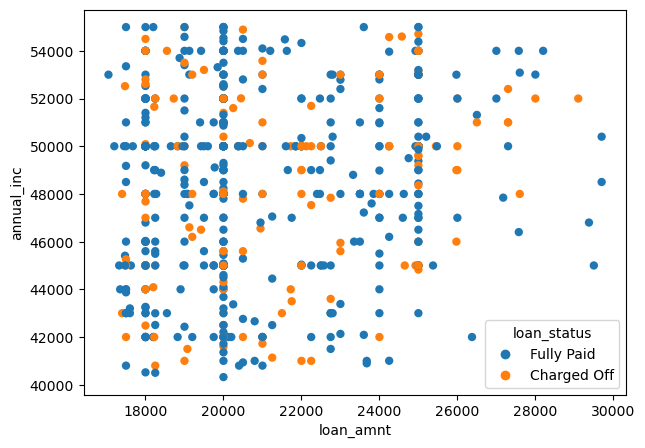

In [78]:
### Reploting the scaterplot in diff scales
bdf=df[(df['loan_amnt']< 30000) & (df['loan_amnt']> 17000) & (df['annual_inc']> 40000) & (df['annual_inc']<55000) & ((df['purpose']=='small_business') | (df['purpose']=='debt_consolidation') |(df['purpose']=='other') | (df['purpose']=='medical'))]
plt.figure(figsize=[7,5])
sns.scatterplot(x='loan_amnt', y='annual_inc', data=bdf, hue='loan_status', ec=None)
plt.show()